<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc_lsb_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elliptic Curve Criptography

with library that use schema of ECDH + AES
1. Elliptic Curve Diffle Hellman for key exchange
2. AES to encrypt & decrypt the massage/plaintext

In [168]:
!pip install eciespy

In [169]:
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

In [170]:
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

private_key = generate_eth_key()
public_key = private_key.public_key

public_key_hex = public_key.to_hex()
private_key_hex = private_key.to_hex()

print("Public Key:", public_key_hex)
print("Private Key:", private_key_hex)

ciphertext = encrypt(public_key_hex, CONTENT.encode())

print("Ciphertext:", ciphertext.hex())

decrypted_message = decrypt(private_key_hex, ciphertext)
print("Decrypted Message:", decrypted_message.decode())

Public Key: 0x88f0db2f0b963160e8d54cf2b263bede5ea48f5468f305579f4a3b66d4a5e5256afab2e95f03005fefeb73c2ca507be3195bc5e87f85d08e5239e220b440ca6d
Private Key: 0xc4a6b35966c79be6e1eaae774fe4035340fb3d801c43b449c5b935f1f281779b
Ciphertext: 0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72
Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


# Koblitz Method & Elliptic Curve El Gamal

## Koblitz Method

to encode & decode integer to coordinate point on cartesius

In [171]:
# Parameters
p = 751  # prime modulus
k = 20    # chosen small integer
a = -1    # coefficient of x in the elliptic curve
b = 188    # constant in the elliptic curve

### Char to Num & Num to Char

In [172]:
# Manually create dictionaries for char-to-num and num-to-char mappings
char_to_num_dict = {
    '0': 10, '1': 11,
    'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19,
    'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27,
    'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35
}

# Reverse dictionary for num-to-char mapping
num_to_char_dict = {v: k for k, v in char_to_num_dict.items()}

# Function to map char to num
def char_to_num(char):
    if char in char_to_num_dict:
        return char_to_num_dict[char]
    else:
        raise ValueError(f"Character '{char}' is not valid. Please use '0-1' or 'a-x'.")

# Function to map num to char
def num_to_char(num):
    if num in num_to_char_dict:
        return num_to_char_dict[num]
    else:
        raise ValueError(f"Number '{num}' is not valid. Please use numbers in the range 10-35.")

def message_to_koblitz(message):
    # Convert the message to a list of characters
    chars = list(message)

    koblitz = []
    for char in chars:
        num = char_to_num(char)
        koblitz.append(num)

    return koblitz

def koblitz_to_message(koblitz):
    message = []
    for num in koblitz:
        char = num_to_char(num)
        message.append(char)

    return ''.join(message)

# Test mapping from char to num
chars = '01ax'

koblitz_message = message_to_koblitz(chars)
print("Koblitz Message:", koblitz_message)

message = koblitz_to_message(koblitz_message)
print("Message:", message)

Koblitz Message: [10, 11, 12, 35]
Message: 01ax


### Koblitz Encoding

In [173]:
import sympy as sp

# Elliptic curve equation: y^2 = x^3 + ax + b mod p
def koblitz_encode(m, max_attempts=1000):
    num = 1  # Start with x = m * k + 1
    attempts = 0

    while attempts < max_attempts:
        x = m * k + num
        rhs = (x**3 + a * x + b) % p  # right-hand side of the elliptic curve equation

        # Check if rhs is a quadratic residue modulo p
        if sp.is_quad_residue(rhs, p):
            y = sp.sqrt_mod(rhs, p)
            return (x, y)  # Return the point (x, y) as a tuple

        num += 1  # Increment to check next x value
        attempts += 1

    # If no valid point is found after max_attempts
    raise ValueError(f"No valid point found after {max_attempts} attempts for message {m}.")

def koblitz_encode_message(message):
  encoded_points = []
  for char in message:
    encoded_point = koblitz_encode(char)
    encoded_points.append(encoded_point)
    print(f"Encoded point for character '{char}': {encoded_point}")

  return encoded_points

encoded_points = koblitz_encode_message(koblitz_message)
encoded_points

Encoded point for character '10': (201, 5)
Encoded point for character '11': (224, 248)
Encoded point for character '12': (241, 230)
Encoded point for character '35': (701, 203)


[(201, 5), (224, 248), (241, 230), (701, 203)]

### Koblitz Decoding

In [174]:
# Decoding: m = (x - 1) / k
def koblitz_decode(x):
    return (x - 1) // k

def koblitz_decode_message(points):
    decoded_message = []
    for point in points:
        decoded_num = koblitz_decode(point[0])  # Decode the x-coordinate
        decoded_message.append(decoded_num)
        print(f"Decoded character for point {point}: {decoded_num}")
    return decoded_message

# Output the result
decoded_points = koblitz_decode_message(encoded_points)
decoded_points

Decoded character for point (201, 5): 10
Decoded character for point (224, 248): 11
Decoded character for point (241, 230): 12
Decoded character for point (701, 203): 35


[10, 11, 12, 35]

In [175]:
message = koblitz_to_message(decoded_points)
message

'01ax'

## Elliptic Curve El Gamal

Elliptic Curve with El Gamal

In [176]:
# Parameters
p = 11  # prime modulus
# k = 20    # chosen small integer
a = 1    # coefficient of x in the elliptic curve
b = 6    # constant in the elliptic curve
# B = (2, 4)

In [177]:
# Parameters
p = 751  # prime modulus
a = -1    # coefficient of x in the elliptic curve
b = 188    # constant in the elliptic curve

In [178]:
import random
import sympy as sp
import json
import base64

class EllipticCurveElGamal:
  def __init__(self, a, b, p, k, B=None):
    self.p = p # primer number
    self.a = a # alpha
    self.b = b # beta

    self.k = k
    self.PointB = B

    self.pointP = None
    self.pointQ = None


    self.char_to_num_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17,
    'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25,
    'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33,
    'y': 34, 'z': 35, '.': 36, '#': 37, '*': 38, '/': 39, '-': 40
    }

    self.num_to_char_dict = {v: k for k, v in self.char_to_num_dict.items()}

    self.k_koblitz = max(self.char_to_num_dict.values()) + 1  # max 24 for 35 char

  def example_function(self):
      print(f"Using persistent k value: {self.k}")

  def elliptic_curve_equation(self, x):
    return (x**3 + self.a*x + self.b) % self.p

  def is_on_curve(self, x, y):
    return self.elliptic_curve_equation(x)  == (y**2) % p

  # def generate_random_number(self):
  #   self.k = random.randint(1, self.p - 1)
  #   return self.k

  def generate_random_point(self):
    while True:
      x = random.randint(1, self.p - 1)
      y = random.randint(1, self.p - 1)
      if self.is_on_curve(x, y):
        return (x, y)

  def mod_inverse(self, a, p):
      if a == 0:
          raise ValueError("Inverse does not exist for 0.")
      return pow(a, p - 2, p)

  def calculate_slope_mod(self, P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2 + self.a) % self.p
        denominator = (2 * y1) % self.p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % self.p
        denominator = (x2 - x1) % self.p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * self.mod_inverse(denominator, self.p)) % self.p
    return slope

  def calculate_add_xr_mod(self, P, Q, m):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - x1 - x2) % self.p
    return xr

  def calculate_add_yr_mod(self, P, Q, m, xr):
    x1, y1 = P
    x2, y2 = Q
    yr = (m * (x1 - xr) - y1) % self.p
    return yr

  def calculate_point_addition(self, P, Q):
    m = self.calculate_slope_mod(P, Q)

    xr = self.calculate_add_xr_mod(P, Q, m)

    yr = self.calculate_add_yr_mod(P, Q, m, xr)

    R = (xr, yr)

    return R

  def calculate_dob_xr_mod(self, P, Q, m):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - (2 * x1)) % self.p
    return xr

  def calculate_dob_yr_mod(self, P, Q, m, xr):
    x1, y1 = P
    yr = (m * (x1 - xr) - y1) % self.p
    return yr

  def calculate_point_doubling(self, P):

    m = self.calculate_slope_mod(P, P)

    xr = self.calculate_dob_xr_mod(P, P, m)

    yr = self.calculate_dob_yr_mod(P, P, m, xr)

    R = (xr, yr)

    return R

  def calculate_point_multiplication(self, P, k):
    if k == 0:
      return None
    elif k == 1:
      return P

    # Initialize R to be the point at infinity, often represented as None in this context
    R = None
    Q = P  # Start with Q as P

    # Double-and-add method
    while k > 0:
        if k % 2 == 1:  # If k is odd, add Q to the result
            if R is None:
                R = Q  # R is the point at infinity initially
            else:
                R = self.calculate_point_addition(R, Q)
        Q = self.calculate_point_addition(Q, Q)  # Double the point Q
        k //= 2  # Move to the next bit

    return R

  def calculate_point_subtract(self, P, Q):
    # Find the inverse of point Q (x_Q, y_Q) -> (x_Q, -y_Q mod p)
    Q_inv = (Q[0], (-Q[1]) % self.p)

    # Subtract P - Q by adding P and Q_inv
    R = self.calculate_point_addition(P, Q_inv)

    return R

  def generate_public_key(self, B, private_key):
    public_key = self.calculate_point_multiplication(B, private_key)
    return public_key

  def enryption(self, M, public_key):
    # k = random.randint(1, self.p - 1) # 1 < k < p - 1

    C1 = self.calculate_point_multiplication(self.PointB, self.k)
    C2 = self.calculate_point_addition(M, self.calculate_point_multiplication(public_key, self.k))

    return (C1, C2)

  def decryption(self, C, private_key):
    C1, C2 = C

    _p = self.calculate_point_multiplication(C1, private_key)

    plain = self.calculate_point_subtract(C2, _p)

    return plain

  # Function to map char to num
  def char_to_num(self, char):
      # Ensure the input is a string; if not, convert it
      char = str(char)

      # Check if the string exists in the dictionary
      if char in self.char_to_num_dict:
          return self.char_to_num_dict[char]
      else:
          # Handle the expanded character set (0-40)
          raise ValueError(f"Character '{char}' is not valid. Please use '0-9', 'a-z', or other valid characters.")


  # Function to map num to char
  def num_to_char(self, num):
      # Ensure that the input is an integer; if it's a string digit, convert to integer
      if isinstance(num, str) and num.isdigit():
          num = int(num)

      # Now we expect num to be an integer
      if isinstance(num, int):
          if num in self.num_to_char_dict:  # Handle numbers 0-40 by converting them using the dictionary
              return self.num_to_char_dict[num]
          else:
              raise ValueError(f"Number '{num}' is out of the valid range (0-40).")
      else:
          raise ValueError(f"Input '{num}' is not valid. Please provide a valid number.")


  def message_to_koblitz(self, message):
      # Convert the message to a list of characters
      chars = list(message)

      koblitz = []
      for char in chars:
          num = self.char_to_num(char)
          koblitz.append(num)

      return koblitz

  def koblitz_to_message(self, koblitz):
      message = []
      for num in koblitz:
          char = self.num_to_char(num)
          message.append(char)

      return ''.join(message)

  def koblitz_encode(self, m, max_attempts=1000):
    num = 1  # Start with x = m * k + 1
    attempts = 0

    while attempts < max_attempts:
        x = m * self.k_koblitz + num
        rhs = (x**3 + self.a * x + self.b) % self.p  # right-hand side of the elliptic curve equation

        # Check if rhs is a quadratic residue modulo p
        if sp.is_quad_residue(rhs, self.p):
            y = sp.sqrt_mod(rhs, self.p)
            return (x, y)  # Return the point (x, y) as a tuple

        num += 1  # Increment to check next x value
        attempts += 1

    # If no valid point is found after max_attempts
    raise ValueError(f"No valid point found after {max_attempts} attempts for message {m}.")

  def koblitz_encode_message(self, message):
    encoded_points = []
    for char in message:
      encoded_point = self.koblitz_encode(char)
      encoded_points.append(encoded_point)
      # print(f"Encoded point for character '{char}': {encoded_point}")

    return encoded_points

  def koblitz_decode(self, x):
    return (x - 1) // self.k_koblitz

  def koblitz_decode_message(self, points):
      decoded_message = []
      for point in points:
          decoded_num = self.koblitz_decode(point[0])  # Decode the x-coordinate
          decoded_message.append(decoded_num)
          # print(f"Decoded character for point {point}: {decoded_num}")
      return decoded_message

  def encrypt_message(self, message, public_key):
      # Encode the message into Koblitz points
      koblitz_message = self.message_to_koblitz(message)
      encoded_message = self.koblitz_encode_message(koblitz_message)
      encrypted_points = []

      # Encrypt each Koblitz point
      for point in encoded_message:
          encrypted_point = self.enryption(point, public_key)
          encrypted_points.append(encrypted_point)

      # Convert encrypted_points (a list of tuples) to a JSON string
      encrypted_message_string = json.dumps(encrypted_points)

      # Optionally, encode the string to base64 for a cleaner ciphertext
      encrypted_message_base64 = base64.b64encode(encrypted_message_string.encode()).decode()

      return encrypted_message_base64, encrypted_points  # Return as readable string

  def decrypt_message(self, encrypted_message_base64, private_key):
      # Decode the base64 string back to the JSON string
      encrypted_message_string = base64.b64decode(encrypted_message_base64).decode()

      # Convert the JSON string back to a list of encrypted points (tuples)
      encrypted_points = json.loads(encrypted_message_string)

      decrypted_message = []

      # Decrypt each point
      for point in encrypted_points:
          decrypted_point = self.decryption(point, private_key)
          decrypted_message.append(decrypted_point)

      # Decode the Koblitz points into the original numeric values
      decoded_koblitz_points = self.koblitz_decode_message(decrypted_message)

      # Convert numeric Koblitz points to characters using num_to_char
      plain_text_message = ''.join([self.num_to_char(num) for num in decoded_koblitz_points])

      return plain_text_message

In [179]:
random_num = random.randint(1, p - 1)
print(f'random number: {random_num}')

elliptic1 = EllipticCurveElGamal(a, b, p, random_num)

# k = elliptic1.generate_random_number()
# print(f'k: {k}')

basis = elliptic1.generate_random_point()
print(f'basis: {basis}')

elliptic1.PointB = basis

print(f'is basis on curve: {elliptic1.is_on_curve(basis[0], basis[1])}')

random number: 242
basis: (555, 444)
is basis on curve: True


In [180]:
private_key = random.randint(1, p - 1)
public_key = elliptic1.generate_public_key(basis, private_key)

print(f'private key: {private_key}')
print(f'public key: {public_key}')

private key: 618
public key: (714, 578)


In [181]:
message = (385, 423)

cipher = elliptic1.enryption(message, public_key)

decrypted_message = elliptic1.decryption(cipher, private_key)

print(f'message: {message}')
print(f'cipher: {cipher}')
print(f'decrypted message: {decrypted_message}')

message: (385, 423)
cipher: ((487, 380), (694, 552))
decrypted message: (385, 423)


In [182]:
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

In [183]:
elliptic1.k_koblitz = 18 # max 18 if add "-#./*"

# plaintexts = "-#./*"
plaintexts = "lorem.#-/*"
# plaintexts = CONTENT
print(f'Plaintext: {plaintexts}')

ciphertexts, points_cipher = elliptic1.encrypt_message(plaintexts, public_key)
print(f'Ciphertext: {ciphertexts}')

decrypted_message = elliptic1.decrypt_message(ciphertexts, private_key)
print(f'Decryptedtext: {decrypted_message}')

Plaintext: lorem.#-/*
Ciphertext: W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ==
Decryptedtext: lorem.#-/*


In [184]:
points_cipher

[((487, 380), (591, 104)),
 ((487, 380), (159, 124)),
 ((487, 380), (734, 552)),
 ((487, 380), (197, 107)),
 ((487, 380), (77, 6)),
 ((487, 380), (406, 557)),
 ((487, 380), (671, 193)),
 ((487, 380), (403, 218)),
 ((487, 380), (594, 141)),
 ((487, 380), (219, 38))]

In [185]:
decrypted_message == CONTENT

False

In [186]:
len(ciphertexts)

344

# Least Significant Bit

In [187]:
!git clone https://github.com/RobinDavid/LSB-Steganography && cd LSB-Steganography && ls && pip install -r requirements.txt

fatal: destination path 'LSB-Steganography' already exists and is not an empty directory.


In [188]:
#!/usr/bin/env python
# coding:UTF-8
"""LSBSteg.py

Usage:
  LSBSteg.py encode -i <input> -o <output> -f <file>
  LSBSteg.py decode -i <input> -o <output>

Options:
  -h, --help                Show this help
  --version                 Show the version
  -f,--file=<file>          File to hide
  -i,--in=<input>           Input image (carrier)
  -o,--out=<output>         Output image (or extracted file)
"""

import cv2
import docopt
import numpy as np


class SteganographyException(Exception):
    pass


class LSBSteg():
    def __init__(self, im):
        self.image = im
        self.height, self.width, self.nbchannels = im.shape
        self.size = self.width * self.height

        self.maskONEValues = [1,2,4,8,16,32,64,128]
        #Mask used to put one ex:1->00000001, 2->00000010 .. associated with OR bitwise
        self.maskONE = self.maskONEValues.pop(0) #Will be used to do bitwise operations

        self.maskZEROValues = [254,253,251,247,239,223,191,127]
        #Mak used to put zero ex:254->11111110, 253->11111101 .. associated with AND bitwise
        self.maskZERO = self.maskZEROValues.pop(0)

        self.curwidth = 0  # Current width position
        self.curheight = 0 # Current height position
        self.curchan = 0   # Current channel position

    def put_binary_value(self, bits): #Put the bits in the image
        for c in bits:
            val = list(self.image[self.curheight,self.curwidth]) #Get the pixel value as a list
            if int(c) == 1:
                val[self.curchan] = int(val[self.curchan]) | self.maskONE #OR with maskONE
            else:
                val[self.curchan] = int(val[self.curchan]) & self.maskZERO #AND with maskZERO

            self.image[self.curheight,self.curwidth] = tuple(val)
            self.next_slot() #Move "cursor" to the next space

    def next_slot(self):#Move to the next slot were information can be taken or put
        if self.curchan == self.nbchannels-1: #Next Space is the following channel
            self.curchan = 0
            if self.curwidth == self.width-1: #Or the first channel of the next pixel of the same line
                self.curwidth = 0
                if self.curheight == self.height-1:#Or the first channel of the first pixel of the next line
                    self.curheight = 0
                    if self.maskONE == 128: #Mask 1000000, so the last mask
                        raise SteganographyException("No available slot remaining (image filled)")
                    else: #Or instead of using the first bit start using the second and so on..
                        self.maskONE = self.maskONEValues.pop(0)
                        self.maskZERO = self.maskZEROValues.pop(0)
                else:
                    self.curheight +=1
            else:
                self.curwidth +=1
        else:
            self.curchan +=1

    def read_bit(self): #Read a single bit int the image
        val = self.image[self.curheight,self.curwidth][self.curchan]
        val = int(val) & self.maskONE
        self.next_slot()
        if val > 0:
            return "1"
        else:
            return "0"

    def read_byte(self):
        return self.read_bits(8)

    def read_bits(self, nb): #Read the given number of bits
        bits = ""
        for i in range(nb):
            bits += self.read_bit()
        return bits

    def byteValue(self, val):
        return self.binary_value(val, 8)

    def binary_value(self, val, bitsize): #Return the binary value of an int as a byte
        binval = bin(val)[2:]
        if len(binval) > bitsize:
            raise SteganographyException("binary value larger than the expected size")
        while len(binval) < bitsize:
            binval = "0"+binval
        return binval

    def encode_text(self, txt):
        l = len(txt)
        binl = self.binary_value(l, 16) #Length coded on 2 bytes so the text size can be up to 65536 bytes long
        self.put_binary_value(binl) #Put text length coded on 4 bytes
        for char in txt: #And put all the chars
            c = ord(char)
            self.put_binary_value(self.byteValue(c))
        return self.image

    def decode_text(self):
        ls = self.read_bits(16) #Read the text size in bytes
        l = int(ls,2)
        i = 0
        unhideTxt = ""
        while i < l: #Read all bytes of the text
            tmp = self.read_byte() #So one byte
            i += 1
            unhideTxt += chr(int(tmp,2)) #Every chars concatenated to str
        return unhideTxt

    def encode_image(self, imtohide):
        w = imtohide.width
        h = imtohide.height
        if self.width*self.height*self.nbchannels < w*h*imtohide.channels:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        binw = self.binary_value(w, 16) #Width coded on to byte so width up to 65536
        binh = self.binary_value(h, 16)
        self.put_binary_value(binw) #Put width
        self.put_binary_value(binh) #Put height
        for h in range(imtohide.height): #Iterate the hole image to put every pixel values
            for w in range(imtohide.width):
                for chan in range(imtohide.channels):
                    val = imtohide[h,w][chan]
                    self.put_binary_value(self.byteValue(int(val)))
        return self.image


    def decode_image(self):
        width = int(self.read_bits(16),2) #Read 16bits and convert it in int
        height = int(self.read_bits(16),2)
        unhideimg = np.zeros((width,height, 3), np.uint8) #Create an image in which we will put all the pixels read
        for h in range(height):
            for w in range(width):
                for chan in range(unhideimg.channels):
                    val = list(unhideimg[h,w])
                    val[chan] = int(self.read_byte(),2) #Read the value
                    unhideimg[h,w] = tuple(val)
        return unhideimg

    def encode_binary(self, data):
        l = len(data)
        if self.width*self.height*self.nbchannels < l+64:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        self.put_binary_value(self.binary_value(l, 64))
        for byte in data:
            byte = byte if isinstance(byte, int) else ord(byte) # Compat py2/py3
            self.put_binary_value(self.byteValue(byte))
        return self.image

    def decode_binary(self):
        l = int(self.read_bits(64), 2)
        output = b""
        for i in range(l):
            output += bytearray([int(self.read_byte(),2)])
        return output


def main():
    args = docopt.docopt(__doc__, version="0.2")
    in_f = args["--in"]
    out_f = args["--out"]
    in_img = cv2.imread(in_f)
    steg = LSBSteg(in_img)
    lossy_formats = ["jpeg", "jpg"]

    if args['encode']:
        #Handling lossy format
        out_f, out_ext = out_f.split(".")
        if out_ext in lossy_formats:
            out_f = out_f + ".png"
            print("Output file changed to ", out_f)

        data = open(args["--file"], "rb").read()
        res = steg.encode_binary(data)
        cv2.imwrite(out_f, res)

    elif args["decode"]:
        raw = steg.decode_binary()
        with open(out_f, "wb") as f:
            f.write(raw)

# if __name__=="__main__":
#     main()

# Lampel Ziv Welch

In [189]:
!git clone https://github.com/joeatwork/python-lzw

fatal: destination path 'python-lzw' already exists and is not an empty directory.


In [190]:
!cd /content/python-lzw && mv lzw/ /content/ && python setup.py install

mv: cannot stat 'lzw/': No such file or directory


In [191]:
import lzw

# Example text to compress (can be any string)
original_text = CONTENT

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup
Original Bytes: b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'
Compressed List (Byte Chunks): [b'\x19', b'\x8c', b'\xc6', b'\x83', b'\x81', b'\xb0', b'\xc4', b'`', b'4', b'\x18', b'\x0c', b'G', b'#', b'q', b'\x84', b'8', b'j', b'#', b'1', b'\x9a', b'\x0e', b'F', b'\x93', b'\x99', b'\xd0', b'\xde', b'f', b'2', b'\x9c', b'\x85', b'F', b'H', b'\xd1', b'\xa4', b'\xc2', b'n', b'\x15', b'\x18', b'\x8e', b'\xa6', b'H', b'\xf9', b'\xba', b'.', b'#', b':', b'\x19', b'L', b'\xe6', b'\x13', b'`', b'\x8e', b'\x17', b'\x0c', b'\x16', b'\x8c', b'\x06', b's', b'!', b'\xa0', b'\x8c', b'\xd8', b'a', b'5', b'\x9a', b'E', b'\xb3', b'\x89', b'\xd0', b'\x8c', b'\xc4', b'#', b'

# Huffman Encoding

In [192]:
import heapq
from collections import Counter

# Class for Huffman Tree Nodes
class HuffmanNode:
    def __init__(self, char=None, freq=0, left=None, right=None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

# Function to build the Huffman Tree
def build_huffman_tree(frequency):
    heap = [HuffmanNode(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(freq=node1.freq + node2.freq, left=node1, right=node2)
        heapq.heappush(heap, merged)

    return heap[0]  # Return the root of the tree

# Function to generate Huffman codes from the Huffman Tree
def generate_huffman_codes(node, current_code="", huffman_codes={}):
    if node is None:
        return

    if node.char is not None:
        huffman_codes[node.char] = current_code

    generate_huffman_codes(node.left, current_code + "0", huffman_codes)
    generate_huffman_codes(node.right, current_code + "1", huffman_codes)

    return huffman_codes

# Function to compress the data using Huffman Encoding
def huffman_compress(data):
    # Count the frequency of each byte
    frequency = Counter(data)

    # Build Huffman Tree
    huffman_tree = build_huffman_tree(frequency)

    # Generate Huffman Codes
    huffman_codes = generate_huffman_codes(huffman_tree)

    # Encode data into its binary representation
    encoded_data = "".join(huffman_codes[byte] for byte in data)

    # Pad the encoded data to make its length a multiple of 8
    padding = 8 - len(encoded_data) % 8
    encoded_data += "0" * padding
    padding_info = "{0:08b}".format(padding)

    # Convert binary data to bytes
    compressed_data = bytearray()
    compressed_data.append(int(padding_info, 2))  # First byte stores the padding information
    for i in range(0, len(encoded_data), 8):
        byte = encoded_data[i:i+8]
        compressed_data.append(int(byte, 2))

    return compressed_data, huffman_tree

# Function to decompress the data using Huffman Encoding
def huffman_decompress(compressed_data, huffman_tree):
    # Convert the compressed data to binary string
    encoded_data = ""
    for byte in compressed_data[1:]:
        encoded_data += "{0:08b}".format(byte)

    # Get the padding information from the first byte
    padding = compressed_data[0]
    encoded_data = encoded_data[:-padding]  # Remove padding

    # Traverse the Huffman tree to decode the binary string
    decoded_data = bytearray()
    node = huffman_tree
    for bit in encoded_data:
        if bit == "0":
            node = node.left
        else:
            node = node.right

        if node.left is None and node.right is None:  # Leaf node
            decoded_data.append(node.char)
            node = huffman_tree

    return decoded_data


# Example Usage of Huffman Compression/Decompression

# Step 1: The original plaintext data (as a byte string)
plaintext = CONTENT.encode()

# Print the original data
print("Original Data (as bytes):", plaintext)
print("Original Data (as string):", plaintext.decode())

# Step 2: Compress the plaintext data using Huffman encoding
compressed_data, huffman_tree = huffman_compress(plaintext)
print("Compressed Data (in bytes):", compressed_data)

# Step 3: Decompress the compressed data back to the original plaintext
decompressed_data = huffman_decompress(compressed_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

# Step 4: Verify that the decompressed data matches the original data
if decompressed_data == plaintext:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Data (as bytes): b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'
Original Data (as string): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup
Compressed Data (in bytes): bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')
Decompressed Data (as bytes): bytearray(b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup')

# Test Image

In [193]:
import os
# Directory where the image will be saved
ori_dir_img = "ori-image"

# Create the ori_dir_img if it doesn't exist
if not os.path.exists(ori_dir_img):
    os.makedirs(ori_dir_img)

stego_dir_img = "stego-image"

# Create the stego_dir_img if it doesn't exist
if not os.path.exists(stego_dir_img):
    os.makedirs(stego_dir_img)

## Lena Image

In [194]:
import requests
from PIL import Image
import io

# URL to the raw image file
url = "https://raw.githubusercontent.com/mikolalysenko/lena/master/lena.png"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    lena_image = Image.open(io.BytesIO(response.content))
    lena_image.show()  # Display the image (optional)
    lena_image.save("ori-image/lena.png")  # Save the image locally
else:
    print("Failed to download the image.")

In [195]:
LENA_IMG = 'ori-image/lena.png'

if not os.path.exists(LENA_IMG):
    raise FileNotFoundError(f"Image not found at {LENA_IMG}")

# Steganography Metric

## MSE

In [196]:
def calculate_mse(original, stego):
    return np.mean((original - stego) ** 2)

## PSNR

In [197]:
def calculate_psnr(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{stego_dir_img}/{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {stego_dir_img}/{target}. Ensure the file exists and is a valid image format.")

    # Calculate MSE using the separated function
    mse = calculate_mse(original, stego)
    if mse == 0:  # If images are identical
        return float('inf')

    # Calculate PSNR using the 10 log10 version
    max_pixel_value = 255.0
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    # print(f'PSNR: {psnr}')
    return psnr

## SSIM

In [198]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original, stego):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    stego_gray = cv2.cvtColor(stego, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM
    ssim_value, _ = ssim(original_gray, stego_gray, full=True)
    return ssim_value

## Get it together

In [199]:
def calculate_stego_metrics(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{stego_dir_img}/{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {stego_dir_img}/{target}. Ensure the file exists and is a valid image format.")

    # Calculate metrics
    mse_value = calculate_mse(original, stego)
    psnr_value = calculate_psnr(target)
    ssim_value = calculate_ssim(original, stego)

    # Print results
    print(f'Metrics between original ({ori_image}) and stego image ({target}):')
    print(f'MSE: {mse_value}')
    print(f'PSNR: {psnr_value}')
    print(f'SSIM: {ssim_value}')

    return mse_value, psnr_value, ssim_value

# LSB Helper

In [200]:
def embed_lsb(target, content, ori_img = LENA_IMG):
  steg = LSBSteg(cv2.imread(ori_img))

  img_encoded = steg.encode_text(content)

  lsb_img = f"{stego_dir_img}/{target}"

  cv2.imwrite(lsb_img, img_encoded)

In [201]:
def extract_lsb(target):
  im = cv2.imread(f"{stego_dir_img}/{target}")

  steg = LSBSteg(im)

  content = steg.decode_text()

  return content

# LSB Only

In [202]:
embed_lsb("lsb_only.png", CONTENT)

In [203]:
extract_lsb("lsb_only.png")

'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'

In [204]:
extract_lsb("lsb_only.png") == CONTENT

True

In [205]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image(image_file):
    """
    Load and display an image using matplotlib.

    Parameters:
    image_path (str): The path to the image file.
    """
    # Load the image
    img = mpimg.imread(f'/content/stego-image/{image_file}')

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

def display_ori_image():
    """
    Load and display an image using matplotlib.

    Parameters:
    image_path (str): The path to the image file.
    """
    # Load the image
    img = mpimg.imread(f'/content/ori-image/lena.png')

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
# display_image('path/to/your/image.png')

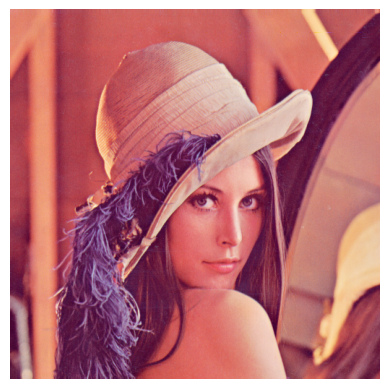

In [206]:
display_ori_image()

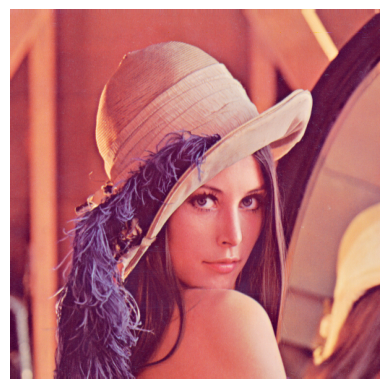

In [207]:
display_image('lsb_only.png')

## Stego Metric

In [208]:
calculate_stego_metrics("lsb_only.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_only.png):
MSE: 0.0009028116861979166
PSNR: 78.57483188820159
SSIM: 0.9999987952461553


(0.0009028116861979166, 78.57483188820159, 0.9999987952461553)

# LSB with ECC

In [209]:
ciphertext

b"\x04'\xeb\xe5dH\x16%\xda\xa9Rr\xb0{\x08.\x17m\xc9\xd9\xe3-\xc3[\x10\xdf\xc9*\xa8\xac\xe1\x9f\x91bIf1\xb0]\x90\xc2AD\x18#3\xd75\xd1>\x9eX\xcab\xdf4\xc2z\xe1\xccQxF\xe1\xd9$\x1c\xf7\xc5\xed\x89\xac/\x98\xa2\xb4\x02\x7f\xb6\xe1\rN|\x9d\xd2\xf9\xb4\xb1\xdc\xf2\xa1\x04\xbe\x9f\xae\x84V\xb8\x19\xaet\xe6rb\xc2\xca\xbfP\x0f\xa5\xbek\xb7\xf3\x11:\xb3x\xf5\xaf\x80\x84\x1d\xf6n\xcdx\x1ex\xad'\x1e\x82\x19\xf5P\x94\x05[S\xce\x8d\xc4\xad H\xdd\x9d\xe8B\xb9\xca\xa4\x01\x96\x19\x1c\xf1\x8a\x0f\xa2\xf5+\xac\x1bv\xa8e\x13\xbbF\xef\x1a\xe1\xd0-L\xaf\xeb\xbd\x18[\x81\xa0\xf8\xb9\xf6s\x9c\xf4\x0fP\x82\x00\xa6\x06&\xa0\x94\xef\xc0\xec\x82r\xa9\xf1I>\x1c\xb7\xe0]+\xfbv\xbf\xe7\xb1\xc2L!\x86\t\x87\xc5R\xfb\x1a\x17\x0c\xc9m\x90H\xeb\x18lY%\xd3\x0be\x9cD@w[\x1b\x05\xaf`\xcf\xc2\xf2\xceW\xc9\xc2\xd0\xd4\x03\xee\xaf\x86nf\xf3\x98\xc4\x80\x8a\xb3\xeer"

In [210]:
embed_lsb("lsb_w_ECC.png", ciphertext.hex())

In [211]:
embed_lsb("lsb_test.png", 'l')

In [212]:
extract_lsb("lsb_test.png")

'l'

In [213]:
calculate_stego_metrics("lsb_test.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_test.png):
MSE: 1.7801920572916668e-05
PSNR: 95.62613501860996
SSIM: 0.9999999738635894


(1.7801920572916668e-05, 95.62613501860996, 0.9999999738635894)

In [214]:
extracted_data = extract_lsb("lsb_w_ECC.png")
extracted_data

'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'

In [215]:
extracted_data == ciphertext.hex()

True

In [216]:
extracted_data = bytes.fromhex(extracted_data)
extracted_data

b"\x04'\xeb\xe5dH\x16%\xda\xa9Rr\xb0{\x08.\x17m\xc9\xd9\xe3-\xc3[\x10\xdf\xc9*\xa8\xac\xe1\x9f\x91bIf1\xb0]\x90\xc2AD\x18#3\xd75\xd1>\x9eX\xcab\xdf4\xc2z\xe1\xccQxF\xe1\xd9$\x1c\xf7\xc5\xed\x89\xac/\x98\xa2\xb4\x02\x7f\xb6\xe1\rN|\x9d\xd2\xf9\xb4\xb1\xdc\xf2\xa1\x04\xbe\x9f\xae\x84V\xb8\x19\xaet\xe6rb\xc2\xca\xbfP\x0f\xa5\xbek\xb7\xf3\x11:\xb3x\xf5\xaf\x80\x84\x1d\xf6n\xcdx\x1ex\xad'\x1e\x82\x19\xf5P\x94\x05[S\xce\x8d\xc4\xad H\xdd\x9d\xe8B\xb9\xca\xa4\x01\x96\x19\x1c\xf1\x8a\x0f\xa2\xf5+\xac\x1bv\xa8e\x13\xbbF\xef\x1a\xe1\xd0-L\xaf\xeb\xbd\x18[\x81\xa0\xf8\xb9\xf6s\x9c\xf4\x0fP\x82\x00\xa6\x06&\xa0\x94\xef\xc0\xec\x82r\xa9\xf1I>\x1c\xb7\xe0]+\xfbv\xbf\xe7\xb1\xc2L!\x86\t\x87\xc5R\xfb\x1a\x17\x0c\xc9m\x90H\xeb\x18lY%\xd3\x0be\x9cD@w[\x1b\x05\xaf`\xcf\xc2\xf2\xceW\xc9\xc2\xd0\xd4\x03\xee\xaf\x86nf\xf3\x98\xc4\x80\x8a\xb3\xeer"

In [217]:
decrypted_message = decrypt(private_key_hex, extracted_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [218]:
decrypted_message.decode() == CONTENT

True

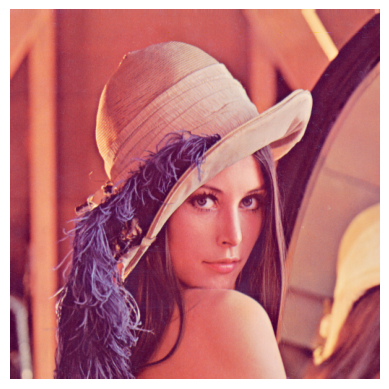

In [219]:
display_image('lsb_w_ECC.png')

## Stego Metric

In [220]:
calculate_stego_metrics("lsb_w_ECC.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC.png):
MSE: 0.0027529398600260415
PSNR: 73.7328363684985
SSIM: 0.9999927049079135


(0.0027529398600260415, 73.7328363684985, 0.9999927049079135)

In [221]:
len(CONTENT)

177

In [222]:
len(ciphertext.hex())

548

# LSB with LZW

In [223]:
compressed_list

[b'\x19',
 b'\x8c',
 b'\xc6',
 b'\x83',
 b'\x81',
 b'\xb0',
 b'\xc4',
 b'`',
 b'4',
 b'\x18',
 b'\x0c',
 b'G',
 b'#',
 b'q',
 b'\x84',
 b'8',
 b'j',
 b'#',
 b'1',
 b'\x9a',
 b'\x0e',
 b'F',
 b'\x93',
 b'\x99',
 b'\xd0',
 b'\xde',
 b'f',
 b'2',
 b'\x9c',
 b'\x85',
 b'F',
 b'H',
 b'\xd1',
 b'\xa4',
 b'\xc2',
 b'n',
 b'\x15',
 b'\x18',
 b'\x8e',
 b'\xa6',
 b'H',
 b'\xf9',
 b'\xba',
 b'.',
 b'#',
 b':',
 b'\x19',
 b'L',
 b'\xe6',
 b'\x13',
 b'`',
 b'\x8e',
 b'\x17',
 b'\x0c',
 b'\x16',
 b'\x8c',
 b'\x06',
 b's',
 b'!',
 b'\xa0',
 b'\x8c',
 b'\xd8',
 b'a',
 b'5',
 b'\x9a',
 b'E',
 b'\xb3',
 b'\x89',
 b'\xd0',
 b'\x8c',
 b'\xc4',
 b'#',
 b'5',
 b'\x1b',
 b'\x05',
 b'\xc2',
 b'\xa3',
 b'\x84',
 b'\xb4',
 b'\xc2',
 b'*',
 b'\x19',
 b'\x0c',
 b'\x85',
 b'F',
 b'\xe3',
 b'}',
 b'\x10',
 b'f',
 b'0',
 b'\x11',
 b'\xc3',
 b'\xea',
 b'C',
 b'\x11',
 b'\xb8',
 b'\x8c',
 b'\xda',
 b'e',
 b'5',
 b'\x18',
 b'N',
 b'f',
 b'S',
 b'h',
 b'\xaa',
 b'T',
 b'n',
 b'\x96',
 b'\x1a',
 b'\x04',
 b'f',
 b'\xb3',

In [224]:
embed_lsb("lsb_w_LZW.png", compressed_list)

In [225]:
extracted_data = extract_lsb("lsb_w_LZW.png")
extracted_data

'\x19\x8cÆ\x83\x81°Ä`4\x18\x0cG#q\x848j#1\x9a\x0eF\x93\x99ÐÞf2\x9c\x85FHÑ¤Ân\x15\x18\x8e¦Hùº.#:\x19Læ\x13`\x8e\x17\x0c\x16\x8c\x06s!\xa0\x8cØa5\x9aE³\x89Ð\x8cÄ#5\x1b\x05Â£\x84´Â*\x19\x0c\x85Fã}\x10f0\x11ÃêC\x11¸\x8cÚe5\x18NfShªTn\x96\x1a\x04f³\x91\x84Úa:Y-&\x83y°Òk\x9f\x99M\x87Zñ¬Âw4\x9b\x84g\x0b\x99\x86´r\x17Ú\r\x15¸©ÜÂ#;\x9b\x8d":åÔë\x1b4\x1aL\x87S\x84\x00'

In [226]:
byte_list = [bytes([ord(char)]) for char in extracted_data]
byte_list

[b'\x19',
 b'\x8c',
 b'\xc6',
 b'\x83',
 b'\x81',
 b'\xb0',
 b'\xc4',
 b'`',
 b'4',
 b'\x18',
 b'\x0c',
 b'G',
 b'#',
 b'q',
 b'\x84',
 b'8',
 b'j',
 b'#',
 b'1',
 b'\x9a',
 b'\x0e',
 b'F',
 b'\x93',
 b'\x99',
 b'\xd0',
 b'\xde',
 b'f',
 b'2',
 b'\x9c',
 b'\x85',
 b'F',
 b'H',
 b'\xd1',
 b'\xa4',
 b'\xc2',
 b'n',
 b'\x15',
 b'\x18',
 b'\x8e',
 b'\xa6',
 b'H',
 b'\xf9',
 b'\xba',
 b'.',
 b'#',
 b':',
 b'\x19',
 b'L',
 b'\xe6',
 b'\x13',
 b'`',
 b'\x8e',
 b'\x17',
 b'\x0c',
 b'\x16',
 b'\x8c',
 b'\x06',
 b's',
 b'!',
 b'\xa0',
 b'\x8c',
 b'\xd8',
 b'a',
 b'5',
 b'\x9a',
 b'E',
 b'\xb3',
 b'\x89',
 b'\xd0',
 b'\x8c',
 b'\xc4',
 b'#',
 b'5',
 b'\x1b',
 b'\x05',
 b'\xc2',
 b'\xa3',
 b'\x84',
 b'\xb4',
 b'\xc2',
 b'*',
 b'\x19',
 b'\x0c',
 b'\x85',
 b'F',
 b'\xe3',
 b'}',
 b'\x10',
 b'f',
 b'0',
 b'\x11',
 b'\xc3',
 b'\xea',
 b'C',
 b'\x11',
 b'\xb8',
 b'\x8c',
 b'\xda',
 b'e',
 b'5',
 b'\x18',
 b'N',
 b'f',
 b'S',
 b'h',
 b'\xaa',
 b'T',
 b'n',
 b'\x96',
 b'\x1a',
 b'\x04',
 b'f',
 b'\xb3',

In [227]:
compressed_list == byte_list

True

In [228]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [229]:
decompressed_text == CONTENT

True

## Stego Metric

In [230]:
calculate_stego_metrics("lsb_w_LZW.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_LZW.png):
MSE: 0.0008722941080729166
PSNR: 78.72417421832482
SSIM: 0.9999988544716335


(0.0008722941080729166, 78.72417421832482, 0.9999988544716335)

# LSB with ECC, LZW

## ECC

In [231]:
ciphertext.hex()

'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'

## LZW

In [232]:
import lzw

# Example text to compress (can be any string)
original_text = ciphertext.hex()

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): 0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72
Original Bytes: b'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a

## LSB

In [233]:
compressed_list

[b'\x18',
 b'\r',
 b'\x06',
 b'C',
 b's',
 b')',
 b'\x88',
 b'\xca',
 b'5',
 b'\x1b',
 b'\r',
 b'\x06',
 b'\x83',
 b'\x81',
 b'\x88',
 b'\xd8',
 b'd',
 b'5',
 b'2',
 b'\x18',
 b'L',
 b'#',
 b'\x91',
 b'\xac',
 b'\x10',
 b'd',
 b'b',
 b'\x18',
 b'\r',
 b'\xe3',
 b'#',
 b'\x81',
 b'\x91',
 b'\x94',
 b'b',
 b'7',
 b'\x1b',
 b'\x19',
 b'\x0c',
 b'c',
 b'\x93',
 b' ',
 b'\xe4',
 b'\xca',
 b'3',
 b'\x19',
 b'H',
 b'\xc6',
 b'c',
 b'S',
 b'\x10',
 b'\xc4',
 b'`',
 b'd',
 b'3',
 b'I',
 b'\x06',
 b'Q',
 b'1',
 b'\xc1',
 b'\x84',
 b'\xc7',
 b'\x1f',
 b'\x1c',
 b'\x99',
 b'\x87',
 b'0',
 b'\xe1',
 b'\x90',
 b'\xd0',
 b'r',
 b'6',
 b'\x1b',
 b'\x0c',
 b'\xc6',
 b'1',
 b'\x98',
 b'\x88',
 b'\xe4',
 b'`',
 b'c',
 b'\x9f',
 b'\x0c',
 b'a',
 b'c',
 b'\x18',
 b'\xe8',
 b'\xce',
 b'\x9e',
 b'd',
 b'\x1b',
 b'\xcb',
 b'\x0c',
 b'\x83',
 b'\x11',
 b'\x99',
 b'\x96',
 b'N',
 b'5',
 b'\x1c',
 b'\x18',
 b'\xcc',
 b'0',
 b'\xf9',
 b'\x88',
 b'\xcc',
 b'i',
 b'I',
 b'\x1b',
 b'\x98',
 b'c',
 b'\xe6',
 b'3',
 b

In [234]:
embed_lsb("lsb_w_ECC_LZW.png", compressed_list)

In [235]:
extracted_data = extract_lsb("lsb_w_ECC_LZW.png")
extracted_data

"\x18\r\x06Cs)\x88Ê5\x1b\r\x06\x83\x81\x88Ød52\x18L#\x91¬\x10db\x18\rã#\x81\x91\x94b7\x1b\x19\x0cc\x93 äÊ3\x19HÆcS\x10Ä`d3I\x06Q1Á\x84Ç\x1f\x1c\x99\x870á\x90Ðr6\x1b\x0cÆ1\x98\x88ä`c\x9f\x0cac\x18èÎ\x9ed\x1bË\x0c\x83\x11\x99\x96N5\x1c\x18Ì0ù\x88ÌiI\x1b\x98cæ3\x18Ö@8\x1a\r£òjQ\x8cÌ7³\x19L\x83\x81ÌÜe;\x9bF\x06\x83\x08!\x98Åk\x97\x99\x06\x86[\x8c\x94Éx\x1c\x98\x86\x92é\x19\x9ai/ÆUÌÖ;L$Å\r»ap\x83a¸Ê\x1fI\xad\x98\x8cÃQ\x80Ã)-2\x8d\x8cF!¹\x9a\x87U0\x98\x86cqÆ\x90Âf\x1c\x0c-#\x19\x8d\x04Êc¨Ãp³l@Übe\x8e\x8cgC](æùÍ1\rFs\x81Ä\x8chaÄ@ºÒc'&\x06b\x1cÖÌ7ÎXÛ\x961·ÓL:s\râ,b\x9bÑ$&\x11ÀÚÎ3ÖZ\x8c¦a\x8d\x8d½_X5lfA\x86%P8KP×±¹xFft3x\x86eñ¤nÃ&\x99\\\x0c\x10ðÙìsßÁ\x8c0p\x11Öy\x14\x7fSõYékFPÁ\x11F\x17ô\x85£aRå%`\x0c\x94ÐØ0\x0eC\x85ÅÍ^\x12á\x85 R\x12D\x89GC\x10hÙf\x0eQ\x01\x903\x0c\x18\x00ÕâB×ÀÜ7KTH\xad¸\x8dÖõ%\x8fN\x03V\x19I\x19\x13\x05ñV\x19[\x87ÙkPZøäcC\x1b¶Êdg\x90\x00"

In [236]:
byte_list = [bytes([ord(char)]) for char in extracted_data]
byte_list

[b'\x18',
 b'\r',
 b'\x06',
 b'C',
 b's',
 b')',
 b'\x88',
 b'\xca',
 b'5',
 b'\x1b',
 b'\r',
 b'\x06',
 b'\x83',
 b'\x81',
 b'\x88',
 b'\xd8',
 b'd',
 b'5',
 b'2',
 b'\x18',
 b'L',
 b'#',
 b'\x91',
 b'\xac',
 b'\x10',
 b'd',
 b'b',
 b'\x18',
 b'\r',
 b'\xe3',
 b'#',
 b'\x81',
 b'\x91',
 b'\x94',
 b'b',
 b'7',
 b'\x1b',
 b'\x19',
 b'\x0c',
 b'c',
 b'\x93',
 b' ',
 b'\xe4',
 b'\xca',
 b'3',
 b'\x19',
 b'H',
 b'\xc6',
 b'c',
 b'S',
 b'\x10',
 b'\xc4',
 b'`',
 b'd',
 b'3',
 b'I',
 b'\x06',
 b'Q',
 b'1',
 b'\xc1',
 b'\x84',
 b'\xc7',
 b'\x1f',
 b'\x1c',
 b'\x99',
 b'\x87',
 b'0',
 b'\xe1',
 b'\x90',
 b'\xd0',
 b'r',
 b'6',
 b'\x1b',
 b'\x0c',
 b'\xc6',
 b'1',
 b'\x98',
 b'\x88',
 b'\xe4',
 b'`',
 b'c',
 b'\x9f',
 b'\x0c',
 b'a',
 b'c',
 b'\x18',
 b'\xe8',
 b'\xce',
 b'\x9e',
 b'd',
 b'\x1b',
 b'\xcb',
 b'\x0c',
 b'\x83',
 b'\x11',
 b'\x99',
 b'\x96',
 b'N',
 b'5',
 b'\x1c',
 b'\x18',
 b'\xcc',
 b'0',
 b'\xf9',
 b'\x88',
 b'\xcc',
 b'i',
 b'I',
 b'\x1b',
 b'\x98',
 b'c',
 b'\xe6',
 b'3',
 b

In [237]:
compressed_list == byte_list

True

In [238]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): 0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72


In [239]:
decompressed_text == ciphertext.hex()

True

In [240]:
cipher_data = bytes.fromhex(decompressed_text)
cipher_data

b"\x04'\xeb\xe5dH\x16%\xda\xa9Rr\xb0{\x08.\x17m\xc9\xd9\xe3-\xc3[\x10\xdf\xc9*\xa8\xac\xe1\x9f\x91bIf1\xb0]\x90\xc2AD\x18#3\xd75\xd1>\x9eX\xcab\xdf4\xc2z\xe1\xccQxF\xe1\xd9$\x1c\xf7\xc5\xed\x89\xac/\x98\xa2\xb4\x02\x7f\xb6\xe1\rN|\x9d\xd2\xf9\xb4\xb1\xdc\xf2\xa1\x04\xbe\x9f\xae\x84V\xb8\x19\xaet\xe6rb\xc2\xca\xbfP\x0f\xa5\xbek\xb7\xf3\x11:\xb3x\xf5\xaf\x80\x84\x1d\xf6n\xcdx\x1ex\xad'\x1e\x82\x19\xf5P\x94\x05[S\xce\x8d\xc4\xad H\xdd\x9d\xe8B\xb9\xca\xa4\x01\x96\x19\x1c\xf1\x8a\x0f\xa2\xf5+\xac\x1bv\xa8e\x13\xbbF\xef\x1a\xe1\xd0-L\xaf\xeb\xbd\x18[\x81\xa0\xf8\xb9\xf6s\x9c\xf4\x0fP\x82\x00\xa6\x06&\xa0\x94\xef\xc0\xec\x82r\xa9\xf1I>\x1c\xb7\xe0]+\xfbv\xbf\xe7\xb1\xc2L!\x86\t\x87\xc5R\xfb\x1a\x17\x0c\xc9m\x90H\xeb\x18lY%\xd3\x0be\x9cD@w[\x1b\x05\xaf`\xcf\xc2\xf2\xceW\xc9\xc2\xd0\xd4\x03\xee\xaf\x86nf\xf3\x98\xc4\x80\x8a\xb3\xeer"

In [241]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [242]:
decrypted_message.decode() == CONTENT

True

## Stego Metric

In [243]:
calculate_stego_metrics("lsb_w_ECC_LZW.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC_LZW.png):
MSE: 0.0022074381510416665
PSNR: 74.69191816698762
SSIM: 0.9999952084672951


(0.0022074381510416665, 74.69191816698762, 0.9999952084672951)

# LSB with Huffman

In [244]:
compressed_data

bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')

In [245]:
compressed_data.hex()

'02df793ea87f1247f753111efbed5975cfc62991d532e6c3a3757369f9d34f443bfbaea6f8def89380e1ef0387ed3990a23b1023f3e0dbca23bc7447be8fe9eaa32569519a5bd1576326a67d8335780f8ed101b51c195eddb20164e5854a8add729e96cfcb46d5b9153eadd8'

In [246]:
embed_lsb("lsb_w_Huffman.png", compressed_data.hex())

In [247]:
extracted_data = extract_lsb("lsb_w_Huffman.png")
extracted_data

'02df793ea87f1247f753111efbed5975cfc62991d532e6c3a3757369f9d34f443bfbaea6f8def89380e1ef0387ed3990a23b1023f3e0dbca23bc7447be8fe9eaa32569519a5bd1576326a67d8335780f8ed101b51c195eddb20164e5854a8add729e96cfcb46d5b9153eadd8'

In [248]:
len(extract_lsb("lsb_w_Huffman.png"))

216

In [249]:
len(CONTENT)

177

In [250]:
huffman_data = bytearray.fromhex(extracted_data)
huffman_data

bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')

In [251]:
decompressed_data = huffman_decompress(huffman_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

Decompressed Data (as bytes): bytearray(b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup')
Decompressed Data (as string): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [252]:
decompressed_data.decode() == CONTENT

True

## Stego Metric

In [253]:
calculate_stego_metrics("lsb_w_Huffman.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_Huffman.png):
MSE: 0.00107574462890625
PSNR: 77.81371174500211
SSIM: 0.9999984186394683


(0.00107574462890625, 77.81371174500211, 0.9999984186394683)

# LSB with ECC, Huffman

## ECC

In [254]:
ciphertext.hex()

'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'

## Huffman

In [255]:
# Example Usage of Huffman Compression/Decompression

# Step 1: The original plaintext data (as a byte string)
plaintext = ciphertext.hex().encode()

# Print the original data
print("Original Data (as bytes):", plaintext)
print("Original Data (as string):", plaintext.decode())

# Step 2: Compress the plaintext data using Huffman encoding
compressed_data, huffman_tree = huffman_compress(plaintext)
print("Compressed Data (in bytes):", compressed_data)

Original Data (as bytes): b'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'
Original Data (as string): 0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a

## LSB

In [256]:
compressed_data

bytearray(b"\x08\xa8\xe1\xcb\xc2H\x87\xf4\xe26e.\x1e\xba\x1b\xa7\xec\xf1C\xd55\xc0\xe3\xd0+\xfa9\xd5\xe6gm\xcfY_N\x85D\x0f\xba#Z\xde\x8f\x88\xf7\xe0\x001\x02?\x0c\\\'\xd6N9\x08\xde\x16\xcf\xdd/\x17\x84\xcf5\xe8\xfd\x91\xd2\xc3um\xe9Wn\xb8\xae\x19\xb4\xcf\xa3\x8c\x1dS>\x95\xb8\xbf=\x9eo\xa8\xbcYlx$\xb7\xf5l\x18\xc4\x1eN\xde\xd6\xb9*\xa9b\xbcK\xb1\x90\xff\x06\xb0\x17\x92izx\xf3\x94L\xd3\x17\xfc\x17c\xe1\xfc~\xf5\x92*X\xa2+ \xdcs\xd8c\xea\x873S\xc7\x8e\xb5\xd6h\xafT\xf5\xfd\x9fv\xa9n\x92\xebm\xfb\x14gB\xf0\xbb\x84\xc9\xf6\xcf:\xe3\x8di\xcb\xb3\xf7+\x7fj\x97\xb5\x94\x10]\x98\xa9*~\xaad\xa4\xe4jX\xc9\xda\xcd~\x1ee\x9f\x85\x0c\xfd\xb1\xca#\xeb\x9b\x14\xb9\xc1\xbf\xde\x8d\xeft\xa5q\xd2.\x9b\xf6\xf1\xad\xd5CZ\x87\xcb\xf7M%\xe20\xabB]\x88\x8a\x11+\xfb\xa2iJ\xd9\xde\x9e\xdc!\xd5\xde:8\xa0\xccitLD\x90W\xd8zv\xb0\xcc\x1e\x00")

In [257]:
compressed_data.hex()

'08a8e1cbc24887f4e236652e1eba1ba7ecf143d535c0e3d02bfa39d5e6676dcf595f4e85440fba235ade8f88f7e00031023f0c5c27d64e3908de16cfdd2f1784cf35e8fd91d2c3756de9576eb8ae19b4cfa38c1d533e95b8bf3d9e6fa8bc596c7824b7f56c18c41e4eded6b92aa962bc4bb190ff06b01792697a78f3944cd317fc1763e1fc7ef5922a58a22b20dc73d863ea873353c78eb5d668af54f5fd9f76a96e92eb6dfb146742f0bb84c9f6cf3ae38d69cbb3f72b7f6a97b594105d98a92a7eaa64a4e46a58c9dacd7e1e659f850cfdb1ca23eb9b14b9c1bfde8def74a571d22e9bf6f1add5435a87cbf74d25e230ab425d888a112bfba2694ad9de9edc21d5de3a38a0cc69744c449057d87a76b0cc1e00'

In [258]:
len(compressed_data.hex())

552

In [259]:
len(ciphertext.hex())

548

In [260]:
embed_lsb('LSB_w_ECC_Huffman.png', compressed_data.hex())

In [261]:
extracted_data = extract_lsb('LSB_w_ECC_Huffman.png')
extracted_data

'08a8e1cbc24887f4e236652e1eba1ba7ecf143d535c0e3d02bfa39d5e6676dcf595f4e85440fba235ade8f88f7e00031023f0c5c27d64e3908de16cfdd2f1784cf35e8fd91d2c3756de9576eb8ae19b4cfa38c1d533e95b8bf3d9e6fa8bc596c7824b7f56c18c41e4eded6b92aa962bc4bb190ff06b01792697a78f3944cd317fc1763e1fc7ef5922a58a22b20dc73d863ea873353c78eb5d668af54f5fd9f76a96e92eb6dfb146742f0bb84c9f6cf3ae38d69cbb3f72b7f6a97b594105d98a92a7eaa64a4e46a58c9dacd7e1e659f850cfdb1ca23eb9b14b9c1bfde8def74a571d22e9bf6f1add5435a87cbf74d25e230ab425d888a112bfba2694ad9de9edc21d5de3a38a0cc69744c449057d87a76b0cc1e00'

In [262]:
huffman_data = bytearray.fromhex(extracted_data)
huffman_data

bytearray(b"\x08\xa8\xe1\xcb\xc2H\x87\xf4\xe26e.\x1e\xba\x1b\xa7\xec\xf1C\xd55\xc0\xe3\xd0+\xfa9\xd5\xe6gm\xcfY_N\x85D\x0f\xba#Z\xde\x8f\x88\xf7\xe0\x001\x02?\x0c\\\'\xd6N9\x08\xde\x16\xcf\xdd/\x17\x84\xcf5\xe8\xfd\x91\xd2\xc3um\xe9Wn\xb8\xae\x19\xb4\xcf\xa3\x8c\x1dS>\x95\xb8\xbf=\x9eo\xa8\xbcYlx$\xb7\xf5l\x18\xc4\x1eN\xde\xd6\xb9*\xa9b\xbcK\xb1\x90\xff\x06\xb0\x17\x92izx\xf3\x94L\xd3\x17\xfc\x17c\xe1\xfc~\xf5\x92*X\xa2+ \xdcs\xd8c\xea\x873S\xc7\x8e\xb5\xd6h\xafT\xf5\xfd\x9fv\xa9n\x92\xebm\xfb\x14gB\xf0\xbb\x84\xc9\xf6\xcf:\xe3\x8di\xcb\xb3\xf7+\x7fj\x97\xb5\x94\x10]\x98\xa9*~\xaad\xa4\xe4jX\xc9\xda\xcd~\x1ee\x9f\x85\x0c\xfd\xb1\xca#\xeb\x9b\x14\xb9\xc1\xbf\xde\x8d\xeft\xa5q\xd2.\x9b\xf6\xf1\xad\xd5CZ\x87\xcb\xf7M%\xe20\xabB]\x88\x8a\x11+\xfb\xa2iJ\xd9\xde\x9e\xdc!\xd5\xde:8\xa0\xccitLD\x90W\xd8zv\xb0\xcc\x1e\x00")

In [263]:
decompressed_data = huffman_decompress(huffman_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

Decompressed Data (as bytes): bytearray(b'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72')
Decompressed Data (as string): 0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f673

In [264]:
cipher_data = bytes.fromhex(decompressed_data.decode())
cipher_data

b"\x04'\xeb\xe5dH\x16%\xda\xa9Rr\xb0{\x08.\x17m\xc9\xd9\xe3-\xc3[\x10\xdf\xc9*\xa8\xac\xe1\x9f\x91bIf1\xb0]\x90\xc2AD\x18#3\xd75\xd1>\x9eX\xcab\xdf4\xc2z\xe1\xccQxF\xe1\xd9$\x1c\xf7\xc5\xed\x89\xac/\x98\xa2\xb4\x02\x7f\xb6\xe1\rN|\x9d\xd2\xf9\xb4\xb1\xdc\xf2\xa1\x04\xbe\x9f\xae\x84V\xb8\x19\xaet\xe6rb\xc2\xca\xbfP\x0f\xa5\xbek\xb7\xf3\x11:\xb3x\xf5\xaf\x80\x84\x1d\xf6n\xcdx\x1ex\xad'\x1e\x82\x19\xf5P\x94\x05[S\xce\x8d\xc4\xad H\xdd\x9d\xe8B\xb9\xca\xa4\x01\x96\x19\x1c\xf1\x8a\x0f\xa2\xf5+\xac\x1bv\xa8e\x13\xbbF\xef\x1a\xe1\xd0-L\xaf\xeb\xbd\x18[\x81\xa0\xf8\xb9\xf6s\x9c\xf4\x0fP\x82\x00\xa6\x06&\xa0\x94\xef\xc0\xec\x82r\xa9\xf1I>\x1c\xb7\xe0]+\xfbv\xbf\xe7\xb1\xc2L!\x86\t\x87\xc5R\xfb\x1a\x17\x0c\xc9m\x90H\xeb\x18lY%\xd3\x0be\x9cD@w[\x1b\x05\xaf`\xcf\xc2\xf2\xceW\xc9\xc2\xd0\xd4\x03\xee\xaf\x86nf\xf3\x98\xc4\x80\x8a\xb3\xeer"

In [265]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [266]:
decrypted_message.decode() == CONTENT

True

## Stego Metric

In [267]:
calculate_stego_metrics('LSB_w_ECC_Huffman.png')

Metrics between original (ori-image/lena.png) and stego image (LSB_w_ECC_Huffman.png):
MSE: 0.002765655517578125
PSNR: 73.71282276248579
SSIM: 0.9999929075762581


(0.002765655517578125, 73.71282276248579, 0.9999929075762581)

# Test

In [268]:
ciphertexts

'W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ=='

In [269]:
embed_lsb("lsb_tests.png", ciphertexts)

In [270]:
512 * 512 * 3

786432

In [271]:
extract_lsb("lsb_tests.png")

'W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ=='

In [272]:
extract_lsb("lsb_tests.png") == ciphertexts

True

In [273]:
calculate_stego_metrics("lsb_tests.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_tests.png):
MSE: 0.00177001953125
PSNR: 75.65102302264691
SSIM: 0.9999966373842059


(0.00177001953125, 75.65102302264691, 0.9999966373842059)

In [274]:
import lzw

# Example text to compress (can be any string)
original_text = ciphertexts

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ==
Original Bytes: b'W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ=='
Compressed List (Byte Chunks): [b'+', b'\x8c', b'N', b'\x86', b'"', b'q', b'\x10', b'\xce', b'3', b'&', b'\x10', b'\xc8', b"'", b'\xa2', b'y', b'\x10', b'\x84', b'd', b'\x85', b'\x10', b'\xa0', b'\xa5', b'C', b'Y', b'\xe2', b'\x14', b'A', b'<', b'\x13', b'H', b'\x85'

In [275]:
embed_lsb("lsb_test_again.png", compressed_list)

In [276]:
compressed_list

[b'+',
 b'\x8c',
 b'N',
 b'\x86',
 b'"',
 b'q',
 b'\x10',
 b'\xce',
 b'3',
 b'&',
 b'\x10',
 b'\xc8',
 b"'",
 b'\xa2',
 b'y',
 b'\x10',
 b'\x84',
 b'd',
 b'\x85',
 b'\x10',
 b'\xa0',
 b'\xa5',
 b'C',
 b'Y',
 b'\xe2',
 b'\x14',
 b'A',
 b'<',
 b'\x13',
 b'H',
 b'\x85',
 b'#',
 b'!',
 b'`',
 b'\xa6',
 b'w',
 b'3',
 b'\xc0',
 b'\x8e',
 b'c',
 b'\x08',
 b'q',
 b'\x8c',
 b'\xe6',
 b'I',
 b'"',
 b'\x13',
 b'F',
 b'\x84',
 b'\xd2',
 b'0',
 b'\xc2',
 b'P',
 b'F',
 b'9',
 b'\x9e',
 b'\t',
 b'\xd1',
 b'Y',
 b'A',
 b'\x10',
 b'\x8a',
 b'y',
 b"'",
 b'\x11',
 b'\x86',
 b'1',
 b'\x12',
 b'\x1c',
 b'L',
 b'\xae',
 b'z',
 b'(',
 b'\x8d',
 b'\t',
 b'\xc7',
 b'\x99',
 b'\t',
 b'4',
 b'\xf4',
 b'g',
 b';',
 b'\xc7',
 b'\xe4',
 b'4',
 b'\x03',
 b'\x19',
 b'\xe8',
 b'\x9c',
 b'C',
 b'\x90',
 b'\xcd',
 b'\n',
 b'\xa7',
 b'\x92',
 b'\xc1',
 b'Z',
 b'^',
 b'I',
 b'#',
 b'A',
 b' ',
 b'\xd0',
 b'\x88',
 b'\xc4',
 b'6',
 b'\x1f',
 b'=',
 b'\x89',
 b'\x93',
 b'b',
 b'\xb0',
 b'\x98',
 b'\\',
 b'h',
 b'\x88',
 b'

In [277]:
ext_data = extract_lsb("lsb_test_again.png")
ext_data

'+\x8cN\x86"q\x10Î3&\x10È\'¢y\x10\x84d\x85\x10\xa0¥CYâ\x14A<\x13H\x85#!`¦w3À\x8ec\x08q\x8cæI"\x13F\x84Ò0ÂPF9\x9e\tÑYA\x10\x8ay\'\x11\x861\x12\x1cL®z(\x8d\tÇ\x99\t4ôg;Çä4\x03\x19è\x9cC\x90Í\n§\x92ÁZ^I#A Ð\x88Ä6\x1f=\x89\x93b°\x98\\h\x88d\x8fH$C\x19$\x9am+\x96Ö&#:%HÙ<\x89\x18¨\x14+±\x9e\x8fI¥È¨\'rq¦¤T*\x8cê×:Ü\x1eË\x0c\x87D/DãQ\x8e/f\'\x95\tÖªe¶JD\x93Ên2é\x84\x926M\x9b\x12O\x04ùÝ\x86÷A¡Ñoô\x8aU®\x80U\x1aÔ(ÅB\x89ã\x190ÇWauü\x9cøÄM5\x11Fµílð°Q\x1e\x8f`\x00'

In [278]:
byte_list = [bytes([ord(char)]) for char in ext_data]
byte_list

[b'+',
 b'\x8c',
 b'N',
 b'\x86',
 b'"',
 b'q',
 b'\x10',
 b'\xce',
 b'3',
 b'&',
 b'\x10',
 b'\xc8',
 b"'",
 b'\xa2',
 b'y',
 b'\x10',
 b'\x84',
 b'd',
 b'\x85',
 b'\x10',
 b'\xa0',
 b'\xa5',
 b'C',
 b'Y',
 b'\xe2',
 b'\x14',
 b'A',
 b'<',
 b'\x13',
 b'H',
 b'\x85',
 b'#',
 b'!',
 b'`',
 b'\xa6',
 b'w',
 b'3',
 b'\xc0',
 b'\x8e',
 b'c',
 b'\x08',
 b'q',
 b'\x8c',
 b'\xe6',
 b'I',
 b'"',
 b'\x13',
 b'F',
 b'\x84',
 b'\xd2',
 b'0',
 b'\xc2',
 b'P',
 b'F',
 b'9',
 b'\x9e',
 b'\t',
 b'\xd1',
 b'Y',
 b'A',
 b'\x10',
 b'\x8a',
 b'y',
 b"'",
 b'\x11',
 b'\x86',
 b'1',
 b'\x12',
 b'\x1c',
 b'L',
 b'\xae',
 b'z',
 b'(',
 b'\x8d',
 b'\t',
 b'\xc7',
 b'\x99',
 b'\t',
 b'4',
 b'\xf4',
 b'g',
 b';',
 b'\xc7',
 b'\xe4',
 b'4',
 b'\x03',
 b'\x19',
 b'\xe8',
 b'\x9c',
 b'C',
 b'\x90',
 b'\xcd',
 b'\n',
 b'\xa7',
 b'\x92',
 b'\xc1',
 b'Z',
 b'^',
 b'I',
 b'#',
 b'A',
 b' ',
 b'\xd0',
 b'\x88',
 b'\xc4',
 b'6',
 b'\x1f',
 b'=',
 b'\x89',
 b'\x93',
 b'b',
 b'\xb0',
 b'\x98',
 b'\\',
 b'h',
 b'\x88',
 b'

In [279]:
compressed_list == byte_list

True

In [280]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ==


In [281]:
decompressed_text == ciphertexts

True

In [282]:
ciphertexts

'W1tbNDg3LCAzODBdLCBbNTkxLCAxMDRdXSwgW1s0ODcsIDM4MF0sIFsxNTksIDEyNF1dLCBbWzQ4NywgMzgwXSwgWzczNCwgNTUyXV0sIFtbNDg3LCAzODBdLCBbMTk3LCAxMDddXSwgW1s0ODcsIDM4MF0sIFs3NywgNl1dLCBbWzQ4NywgMzgwXSwgWzQwNiwgNTU3XV0sIFtbNDg3LCAzODBdLCBbNjcxLCAxOTNdXSwgW1s0ODcsIDM4MF0sIFs0MDMsIDIxOF1dLCBbWzQ4NywgMzgwXSwgWzU5NCwgMTQxXV0sIFtbNDg3LCAzODBdLCBbMjE5LCAzOF1dXQ=='

In [283]:
len(ciphertexts)

344

In [284]:
calculate_stego_metrics("lsb_test_again.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_test_again.png):
MSE: 0.0012423197428385417
PSNR: 77.1884697382046
SSIM: 0.9999980223046372


(0.0012423197428385417, 77.1884697382046, 0.9999980223046372)

# Huffman 2

In [285]:
!git clone https://github.com/w-henderson/Huffpy.git

fatal: destination path 'Huffpy' already exists and is not an empty directory.


In [286]:
!python Huffpy/setup.py install

Traceback (most recent call last):
  File "/content/Huffpy/setup.py", line 3, in <module>
    with open("README.md", "r") as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'README.md'


In [287]:
import Huffpy.huffpy as huffpy

coder = huffpy.HuffmanCoder()
stringToEncode = CONTENT

huffmanString, tree = coder.encode(stringToEncode)
huffmanBytes = coder.toBytes(huffmanString, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)

stringToEncode == decodedString

True

In [288]:
huffmanBytes

bytearray(b'\x00\x00\x03V[[[[[["o",["2",["f","/"]]],["3","1"]],"#"],[[[["g","."],"4"],"r"],[["d","b"],["9","7"]]]],[[[["p","w"],["-","j"]],["k","m"]],[["t","n"],"0"]]],[[["i",["u",[[["6","c"],"8"],"5"]]],[["h","s"],"e"]],["a",["*","l"]]]]\x08"f\xcc\x06\xe4\xb8g\x1e\xee\xf3\x8c\xcd\x0b\x15`\x00\xd6^2\xcb\x19\xbcl\x8c\x8c\xd6\x00,\xb2\x1b\xc43\x8e=\'\t\'$\x7f*\x12\xfc\xa8\x13E?#\xc8o\xdc\x08\x174\x02<\x13\x8b\xbc\xe2\xe1\x9e+\xb4\xf5m|\xcbi\rAQr\xf3\x05Y\x94\x03\xe1Bm\xfc\x97\xca\xc8\xc3E\x0b\xfc\x9e(:\xf55b\xa8\xe1E\xb05\xb9.E\xeaA\x92@')

In [289]:
decodedHuffmanString

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [290]:
print(f"Panjang stringToEncode: {len(stringToEncode)}")
print(f"Panjang huffmanString: {len(huffmanString)}")
print(f"Panjang huffmanBytes: {len(huffmanBytes)}")
print(f"Panjang decodedHuffmanString: {len(decodedHuffmanString)}")
print(f"Panjang decodedString: {len(decodedString)}")

Panjang stringToEncode: 177
Panjang huffmanString: 854
Panjang huffmanBytes: 324
Panjang decodedHuffmanString: 854
Panjang decodedString: 177


In [291]:
huffmanString

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [292]:
# Function to convert binary string to text (ASCII)
def binary_to_ascii(binary_str):
    # Ensure the binary string is divisible by 8
    if len(binary_str) % 8 != 0:
        raise ValueError("The binary string length is not divisible by 8.")

    # Convert binary values to ASCII text
    binary_values = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    ascii_characters = [chr(int(bv, 2)) for bv in binary_values]

    return ''.join(ascii_characters)

# Function to convert ASCII text back to binary string
def ascii_to_binary(text):
    return ''.join(format(ord(char), '08b') for char in text)

In [293]:
# Function to convert binary string to text (ASCII) and handle non-divisible by 8 lengths
def binary_to_ascii_with_padding(binary_str):
    # Add '00' padding if the binary string is not divisible by 8
    padding_length = 8 - (len(binary_str) % 8)
    if padding_length != 8:
        binary_str = binary_str + '0' * padding_length

    # Convert binary values to ASCII text
    binary_values = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    ascii_characters = [chr(int(bv, 2)) for bv in binary_values]

    return ''.join(ascii_characters), padding_length

# Function to convert ASCII text back to binary string and remove padding if needed
def ascii_to_binary_with_padding(text, padding_length):
    binary_str = ''.join(format(ord(char), '08b') for char in text)
    # Remove the padding that was added earlier
    return binary_str[:-padding_length] if padding_length != 8 else binary_str

# Your binary string (with a length not divisible by 8)
binary_string = huffmanString

# Convert binary to ASCII text with padding
ascii_message, padding_length = binary_to_ascii_with_padding(binary_string)

# Convert the ASCII message back to binary and remove padding
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)

ascii_message, binary_back  # Display the ASCII message and the binary string

('\x08"fÌ\x06ä¸g\x1eîó\x8cÍ\x0b\x15`\x00Ö^2Ë\x19¼l\x8c\x8cÖ\x00,²\x1bÄ3\x8e=\'\t\'$\x7f*\x12ü¨\x13E?#ÈoÜ\x08\x174\x02<\x13\x8b¼âá\x9e+´õm|Ëi\rAQró\x05Y\x94\x03áBmü\x97ÊÈÃE\x0bü\x9e(:õ5b¨áE°5¹.EêA\x92@',
 '000010000010001001100110110011000000011011100100101110000110011100011110111011101111001110001100110011010000101100010101011000000000000011010110010111100011001011001011000110011011110001101100100011001000110011010110000000000010110010110010000110111100010000110011100011100011110100100111000010010010011100100100011111110010101000010010111111001010100000010011010001010011111100100011110010000110111111011100000010000001011100110100000000100011110000010011100010111011110011100010111000011001111000101011101101001111010101101101011111001100101101101001000011010100000101010001011100101111001100000101010110011001010000000011111000010100001001101101111111001001011111001010110010001100001101000101000010111111110010011110001010000011101011110101001101010110001010101000111000010100010110110000001

In [294]:
binary_back == binary_string

True

In [295]:
len(CONTENT)

177

In [296]:
len(ascii_message)

107

# LSB with Huffman 2

In [297]:
embed_lsb("lsb_w_Huffman2.png", ascii_message)

In [298]:
len(ascii_message)

107

In [299]:
extracted_data = extract_lsb("lsb_w_Huffman2.png")
extracted_data

'\x08"fÌ\x06ä¸g\x1eîó\x8cÍ\x0b\x15`\x00Ö^2Ë\x19¼l\x8c\x8cÖ\x00,²\x1bÄ3\x8e=\'\t\'$\x7f*\x12ü¨\x13E?#ÈoÜ\x08\x174\x02<\x13\x8b¼âá\x9e+´õm|Ëi\rAQró\x05Y\x94\x03áBmü\x97ÊÈÃE\x0bü\x9e(:õ5b¨áE°5¹.EêA\x92@'

In [300]:
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)
binary_back

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [301]:
binary_back == huffmanString

True

In [302]:
huffmanBytes = coder.toBytes(binary_back, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)
decodedString

'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'

## Stego Metric

In [303]:
calculate_stego_metrics("lsb_w_Huffman2.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_Huffman2.png):
MSE: 0.00057220458984375
PSNR: 80.5552902376389
SSIM: 0.9999991737848752


(0.00057220458984375, 80.5552902376389, 0.9999991737848752)

# LSB with ECC, Huffman 2

In [304]:
ciphertext.hex()

'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'

In [305]:
import Huffpy.huffpy as huffpy

coder = huffpy.HuffmanCoder()
stringToEncode = ciphertext.hex()

huffmanString, tree = coder.encode(stringToEncode)
huffmanString

'001101110000111001000101010011001011011101111000000110110000110011011001100110101100000011100000010100111110010100111000000001000001111010111101001010101101101001001111000011010010111111000101000100111101011000101010000010011001100010010010010000011010011010100001101100000111101010111011111100010101001111001101101000110010000001110001011101110001100000001111111111111101111011111100110100011111010010100100110010000010100110110000110101101111011100100000111010010100000100100010110000011110100001111011010000011101101000000111000100100110111000101100010011011000101010010010000001101010100010010000010101110011000011100110010110110100000100111101011101001110001010101101110100000110101001010111010100011101001001100000100100010011011101010100101001101001010010000111110010110101100000011010100101001110011101001011111000001011000000100000001010010101011011000011001101101001110001010100101101010101111001101111000100011111100101011111111010000110110010010110100000111000011100011101011010111011010

In [306]:
ascii_message, padding_length = binary_to_ascii_with_padding(huffmanString)
ascii_message

'7\x0eEL·x\x1b\x0cÙ\x9aÀàSå8\x04\x1e½*ÚO\r/Å\x13Ö*\t\x98\x92A¦¡°z»ñSÍ£ qw\x18\x0fÿÞüÑô¤È)°Ö÷ éA"Áè{AÚ\x07\x12n,M\x8a\x92\x06¨\x90W0æ[A=tâ\xadÐjWQÒ`\x917T¦\x94\x87ËX\x1a\x94çKà° )VÃ6\x9cTµ^o\x11ù_èl\x96\x83\x87\x1dk´-è\x14è\x9d\x0e\x14\x80\x1alÃ§<ÅÏ$\x8d\'\x9d\x03xÝ\xadHpZ)\x971«\x1a\x12a\x896\x90l\x05\x92\x15ë\x98¼\x1fU{F\x19AÓ\rr\x96E]\x18Å\x81\x93hZkï¢g6Ã\x803\x9b;\x0b\x93§F#B\x80à\x9aazô\x12^CÍ\x05eëVNQ r\x01\x8b:\x8e,Àe\x19\x1e2*½£xE\x18²Ê\x0cß5¼¢wsîÅ\x15<\x96³& `$Î* Ó×?D\x96\x8b´»o¨\'\x83\x89_Dà'

In [307]:
len(ascii_message), len(ciphertext.hex())

(274, 548)

In [308]:
embed_lsb("lsb_w_ECC_Huffman2.png", ascii_message)

In [309]:
extracted_data = extract_lsb("lsb_w_ECC_Huffman2.png")
extracted_data

'7\x0eEL·x\x1b\x0cÙ\x9aÀàSå8\x04\x1e½*ÚO\r/Å\x13Ö*\t\x98\x92A¦¡°z»ñSÍ£ qw\x18\x0fÿÞüÑô¤È)°Ö÷ éA"Áè{AÚ\x07\x12n,M\x8a\x92\x06¨\x90W0æ[A=tâ\xadÐjWQÒ`\x917T¦\x94\x87ËX\x1a\x94çKà° )VÃ6\x9cTµ^o\x11ù_èl\x96\x83\x87\x1dk´-è\x14è\x9d\x0e\x14\x80\x1alÃ§<ÅÏ$\x8d\'\x9d\x03xÝ\xadHpZ)\x971«\x1a\x12a\x896\x90l\x05\x92\x15ë\x98¼\x1fU{F\x19AÓ\rr\x96E]\x18Å\x81\x93hZkï¢g6Ã\x803\x9b;\x0b\x93§F#B\x80à\x9aazô\x12^CÍ\x05eëVNQ r\x01\x8b:\x8e,Àe\x19\x1e2*½£xE\x18²Ê\x0cß5¼¢wsîÅ\x15<\x96³& `$Î* Ó×?D\x96\x8b´»o¨\'\x83\x89_Dà'

In [310]:
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)
binary_back

'001101110000111001000101010011001011011101111000000110110000110011011001100110101100000011100000010100111110010100111000000001000001111010111101001010101101101001001111000011010010111111000101000100111101011000101010000010011001100010010010010000011010011010100001101100000111101010111011111100010101001111001101101000110010000001110001011101110001100000001111111111111101111011111100110100011111010010100100110010000010100110110000110101101111011100100000111010010100000100100010110000011110100001111011010000011101101000000111000100100110111000101100010011011000101010010010000001101010100010010000010101110011000011100110010110110100000100111101011101001110001010101101110100000110101001010111010100011101001001100000100100010011011101010100101001101001010010000111110010110101100000011010100101001110011101001011111000001011000000100000001010010101011011000011001101101001110001010100101101010101111001101111000100011111100101011111111010000110110010010110100000111000011100011101011010111011010

In [311]:
binary_back == huffmanString

True

In [312]:
huffmanBytes = coder.toBytes(binary_back, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)
decodedString

'0427ebe564481625daa95272b07b082e176dc9d9e32dc35b10dfc92aa8ace19f9162496631b05d90c24144182333d735d13e9e58ca62df34c27ae1cc517846e1d9241cf7c5ed89ac2f98a2b4027fb6e10d4e7c9dd2f9b4b1dcf2a104be9fae8456b819ae74e67262c2cabf500fa5be6bb7f3113ab378f5af80841df66ecd781e78ad271e8219f55094055b53ce8dc4ad2048dd9de842b9caa40196191cf18a0fa2f52bac1b76a86513bb46ef1ae1d02d4cafebbd185b81a0f8b9f6739cf40f508200a60626a094efc0ec8272a9f1493e1cb7e05d2bfb76bfe7b1c24c21860987c552fb1a170cc96d9048eb186c5925d30b659c4440775b1b05af60cfc2f2ce57c9c2d0d403eeaf866e66f398c4808ab3ee72'

In [313]:
cipher_data = bytes.fromhex(decompressed_data.decode())
cipher_data

b"\x04'\xeb\xe5dH\x16%\xda\xa9Rr\xb0{\x08.\x17m\xc9\xd9\xe3-\xc3[\x10\xdf\xc9*\xa8\xac\xe1\x9f\x91bIf1\xb0]\x90\xc2AD\x18#3\xd75\xd1>\x9eX\xcab\xdf4\xc2z\xe1\xccQxF\xe1\xd9$\x1c\xf7\xc5\xed\x89\xac/\x98\xa2\xb4\x02\x7f\xb6\xe1\rN|\x9d\xd2\xf9\xb4\xb1\xdc\xf2\xa1\x04\xbe\x9f\xae\x84V\xb8\x19\xaet\xe6rb\xc2\xca\xbfP\x0f\xa5\xbek\xb7\xf3\x11:\xb3x\xf5\xaf\x80\x84\x1d\xf6n\xcdx\x1ex\xad'\x1e\x82\x19\xf5P\x94\x05[S\xce\x8d\xc4\xad H\xdd\x9d\xe8B\xb9\xca\xa4\x01\x96\x19\x1c\xf1\x8a\x0f\xa2\xf5+\xac\x1bv\xa8e\x13\xbbF\xef\x1a\xe1\xd0-L\xaf\xeb\xbd\x18[\x81\xa0\xf8\xb9\xf6s\x9c\xf4\x0fP\x82\x00\xa6\x06&\xa0\x94\xef\xc0\xec\x82r\xa9\xf1I>\x1c\xb7\xe0]+\xfbv\xbf\xe7\xb1\xc2L!\x86\t\x87\xc5R\xfb\x1a\x17\x0c\xc9m\x90H\xeb\x18lY%\xd3\x0be\x9cD@w[\x1b\x05\xaf`\xcf\xc2\xf2\xceW\xc9\xc2\xd0\xd4\x03\xee\xaf\x86nf\xf3\x98\xc4\x80\x8a\xb3\xeer"

In [314]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


## Stego Metric

In [315]:
calculate_stego_metrics("lsb_w_ECC_Huffman2.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC_Huffman2.png):
MSE: 0.0014495849609375
PSNR: 76.51836686202762
SSIM: 0.9999973567993121


(0.0014495849609375, 76.51836686202762, 0.9999973567993121)